# The Basics: figures, subplots, pyplot and the OOI

# Matplotlib
## Introduction
Matplotlib is a library for producing publication-quality figures. mpl (for short) was designed from the bottom-up to serve dual-purposes. First, to allow for interactive, cross-platform control of figures and plots, and second, to make it very easy to produce static raster or vector graphics files without the need for any GUIs. Furthermore, mpl -- much like Python itself -- gives the developer complete control over the appearance of their plots, while still being very usable through a powerful defaults system.



## Online Documentation
The [matplotlib.org](http://matplotlib.org) project website is the primary online resource for the library's documentation. It contains [examples](http://matplotlib.org/examples/index.html), [FAQs](http://matplotlib.org/faq/index.html), [API documentation](http://matplotlib.org/api/index.html), and, most importantly, the [gallery](http://matplotlib.org/gallery.html).

## Gallery
Many users of matplotlib are often faced with the question, "I want to make a plot that has X with Y in the same figure, but it needs to look like Z". Good luck getting an answer from a web search with that query. This is why the [gallery](http://matplotlib.org/gallery.html) is so useful, because it showcases the variety of ways one can make plots. Browse through the gallery, click on any figure that has pieces of what you want to see the code that generated it. Soon enough, you will be like a chef, mixing and matching components to produce your masterpiece!

As always, if you have a new and interesting plot that demonstrates a feature of matplotlib, feel free to submit a well-commented version of the example code for inclusion.

# Quick note on "backends" and IPython/Jupyter notebooks
Matplotlib has multiple backends. The backends allow mpl to be used on a variety of platforms with a variety of GUI toolkits (GTK, Qt, Wx, etc.), all of them written so that most of the time, you will not need to care which backend you are using. 

In [2]:
#from matplotlib import get_backend
#print get_backend()

Normally we wouldn't need to think about this too much, but IPython/Jupyter notebooks behave a touch differently than "normal" python.

Inside of IPython, it's often easiest to use the IPython ``nbagg`` backend.  This allows plots to be displayed and interacted with inline in the browser in an IPython notebook.  Otherwise, figures will pop up in a separate gui window.

We can do this in two ways:

1. The IPython ``%matplotlib backend_name`` "magic" command (or ``plt.ion()``, which behaves similarly)
   - Figures will be shown automatically by IPython, even if you don't call ``plt.show()``.
     
2. ``matplotlib.use("backend_name")``
   - Figures will only be shown when you call ``plt.show()``.

A common practice in the data science community is to use ``%matplotlib`` magic command, so that is what we are going to do. 

(One final note: if you are going to change the backends, you need to do this before you ``import matplotlib.pyplot``.)

In [1]:
#matplotlib.use('nbagg') # How to use another backend
%matplotlib inline

# On with the show!
Matplotlib is a large project and can seem daunting at first. However, by learning the components, it should begin to feel much smaller and more approachable.

### Anatomy of a "Plot"

People use "plot" to mean many different things.  Here, we'll be using a consistent terminology (mirrored by the names of the underlying classes, etc):


<img src="images/figure_axes_axis_labeled.png">

The ``Figure`` is the top-level container in this hierarchy.  It is the overall window/page that everything is drawn on.  You can have multiple independent figures and ``Figure``s can contain multiple ``Axes``. 

Most plotting ocurs on an ``Axes``.  The axes is effectively the area that we plot data on and any ticks/labels/etc associated with it.  Usually we'll set up an Axes with a call to ``subplot`` (which places Axes on a regular grid), so in most cases, ``Axes`` and ``Subplot`` are synonymous.

Each ``Axes`` has an ``XAxis`` and a ``YAxis``.  These contain the ticks, tick locations, labels, etc.  In this lesson, we'll mostly control ticks, tick labels, and data limits through other mechanisms, so we won't touch the individual ``Axis`` part of things all that much.  However, it's worth mentioning here to explain where the term ``Axes`` comes from.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Our first Figure/Axes

All plotting is done with respect to an [`Axes`](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes). An *Axes* is made up of [`Axis`](http://matplotlib.org/api/axis_api.html#matplotlib.axis.Axis) objects and many other things. An *Axes* object must belong to a *Figure* (and only one *Figure*). Most commands you will ever issue will be with respect to this *Axes* object.

Typically, you'll set up a `Figure`, and then add an `Axes` to it. 

You can use `fig.add_axes`, but in most cases, you'll find that adding a subplot will fit your needs perfectly. (Again a "subplot" is just an axes on a grid system.) 

In [5]:
fig = plt.figure() # empty figure
plt.show()

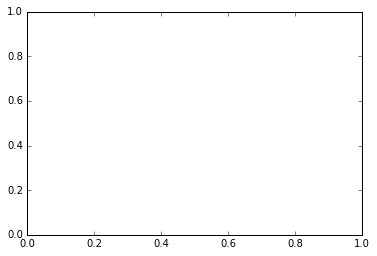

In [6]:
fig = plt.figure()
fig.add_subplot(1,1,1); # empty plot

### Basic Plotting

Most plotting happens on an `Axes`.  Therefore, if you're plotting something on an axes, then you'll use one of its methods.

We'll talk about different plotting methods in more depth in the next section.  For now, let's focus on two methods: `plot` and `scatter`.

`plot` draws points with lines connecting them.  `scatter` draws unconnected points, optionally scaled or colored by additional variables.

As a basic example:

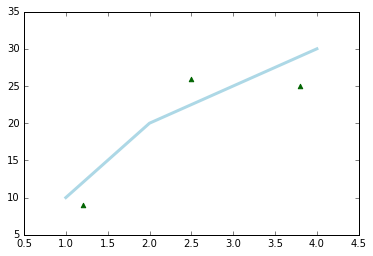

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
ax.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], color='darkgreen', marker='^')
ax.set_xlim(0.5, 4.5);
plt.show()

## Axes methods vs. pyplot: object oriented interface vs. pyplot approach

Interestingly, just about all methods of an *Axes* object exist as a function in the *pyplot* module (and vice-versa). For example, when calling `plt.xlim(1, 10)`, *pyplot* calls `ax.set_xlim(1, 10)` on whichever *Axes* is "current". Here is an equivalent version of the above example using just pyplot.

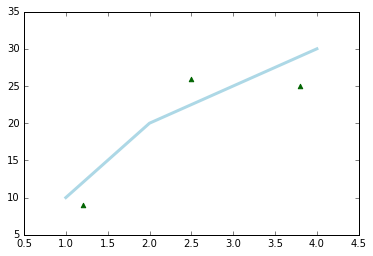

In [8]:
plt.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
plt.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], color='darkgreen', marker='^')
plt.xlim(0.5, 4.5)
plt.show()

Much cleaner, and much clearer! So, why will most of my examples not follow the pyplot approach? Because [PEP20](http://www.python.org/dev/peps/pep-0020/) "The Zen of Python" says:

**"Explicit is better than implicit"**

While very simple plots, with short scripts would benefit from the conciseness of the pyplot implicit approach, when doing more complicated plots, or working within larger scripts, you will want to explicitly pass around the *Axes* and/or *Figure* object to operate upon.

The advantage of keeping which axes we're working with very clear in our code will become more obvious when we start to have multiple axes in one figure.

## Another example: pyplot vs. OOI

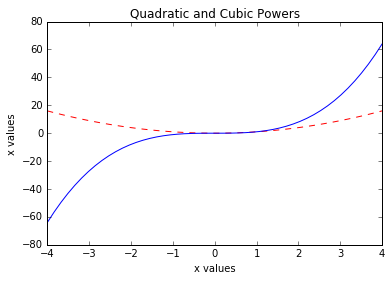

In [32]:
# pyplot
x = np.linspace(-4,4)
y1, y2 = x**2, x**3
plt.plot(x, y1, 'r--', x, y2, 'b')
plt.title('Quadratic and Cubic Powers')
plt.xlabel('x values')
plt.ylabel('y values')

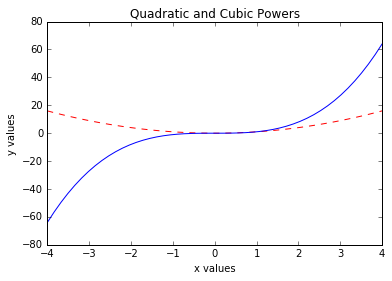

In [35]:
# Object Oriented Interface
fig, ax = plt.subplots()
ax.plot(x, y1, 'r--')
ax.plot(x, y2, 'b')
ax.set_title('Quadratic and Cubic Powers')
ax.set_xlabel('x values')
ax.set_ylabel('y values');

### Multiple Axes

We've mentioned before that a figure can have more than one `Axes` on it.  If you want your axes to be on a regular grid system, then it's easiest to use `plt.subplots(...)` to create a figure and add the axes to it automatically.

For example:

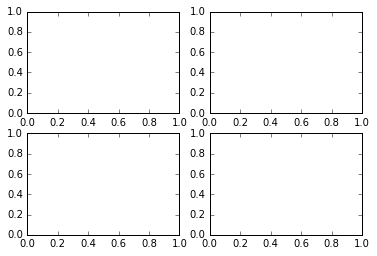

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=2)

In [20]:
print axes.size
print axes.shape
axes[0,0]

4
(2L, 2L)


`plt.subplots(...)` created a new figure and added 4 subplots to it.  The `axes` object that was returned is a 2D numpy object array.  Each item in the array is one of the subplots.  They're laid out as you see them on the figure.  

Therefore, when we want to work with one of these axes, we can index the `axes` array and use that item's methods.

For example:

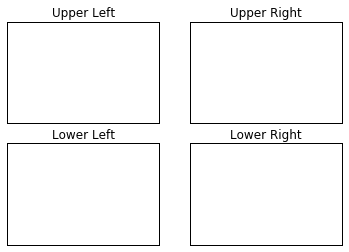

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0,0].set_title('Upper Left')
axes[0,1].set_title('Upper Right')
axes[1,0].set_title('Lower Left')
axes[1,1].set_title('Lower Right')

# To iterate over all items in a multidimensional numpy array, use the `flat` attribute
for ax in axes.flat:
    # Remove all xticks and yticks...
    ax.set_xticks([])
    ax.set_yticks([])

One really nice thing about `plt.subplots()` is that when it's called with no arguments, it creates a new figure with a single subplot. 

Any time you see something like

```
fig = plt.figure()
ax = fig.add_subplot(111)
```

You can replace it with:

```
fig, ax = plt.subplots()
```

We'll be using that approach for the rest of the examples.  It's much cleaner.  

However, keep in mind that we're still creating a figure and adding axes to it.  When we start making plot layouts that can't be described by `subplots`, we'll go back to creating the figure first and then adding axes to it one-by-one.

### Create a figure showing the shape of the first 4 power functions

In [4]:
x = np.linspace(start=-10, stop=10, num=150)

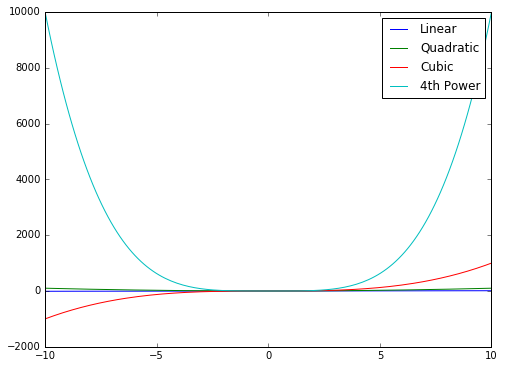

In [5]:
# All functions in one axes
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(x, x, label='Linear')
ax.plot(x, x**2,  label='Quadratic')
ax.plot(x, x**3, label='Cubic')
ax.plot(x, x**4, label='4th Power')
ax.legend()

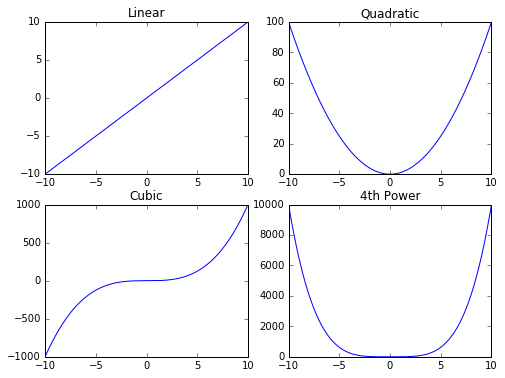

In [6]:
# 4 Axes/Subplots: One function in one axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (8,6))
axes[0,0].set_title('Linear')
axes[0,0].plot(x, x)
axes[0,1].set_title('Quadratic')
axes[0,1].plot(x, x**2)
axes[1,0].set_title('Cubic')
axes[1,0].plot(x, x**3)
axes[1,1].set_title('4th Power')
axes[1,1].plot(x, x**4)

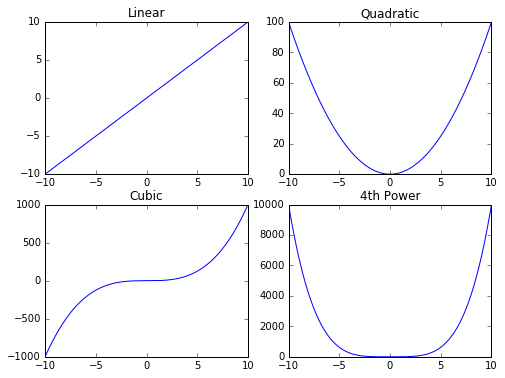

In [7]:
# A more elegant approach
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (8,6))
function_names = ['Linear','Quadratic','Cubic','4th Power']
for i, name in enumerate(function_names):
    axes.flatten()[i].set_title(name)
    axes.flatten()[i].plot(x, x**(i+1))